In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline

# INITIAL PERIOD ANALYSIS of COVID-19 IN INDIA

In [2]:
fread=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\AgeGroupDetails.csv")
fread1=fread.select_dtypes(include=['float64','int64'])
fread2=fread.select_dtypes(include=['object'])
fread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [3]:
fread1.head()

Sno  TotalCases
0    1          22
1    2          27
2    3         172
3    4         146
4    5         112

# The following gives details about the percentage of the age group being affected in India in the months of january,february and march.

In [4]:
fread2.head()

AgeGroup Percentage
0      0-9      3.18%
1    10-19      3.90%
2    20-29     24.86%
3    30-39     21.10%
4    40-49     16.18%

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(fread['AgeGroup'])
print(len(le.classes_))
print(le.classes_)

10
['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '>=80'
 'Missing']


## Graph portraying the current cases and the age groups affected in India

C:\Users\SAURAV BORAH\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'cmaps'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


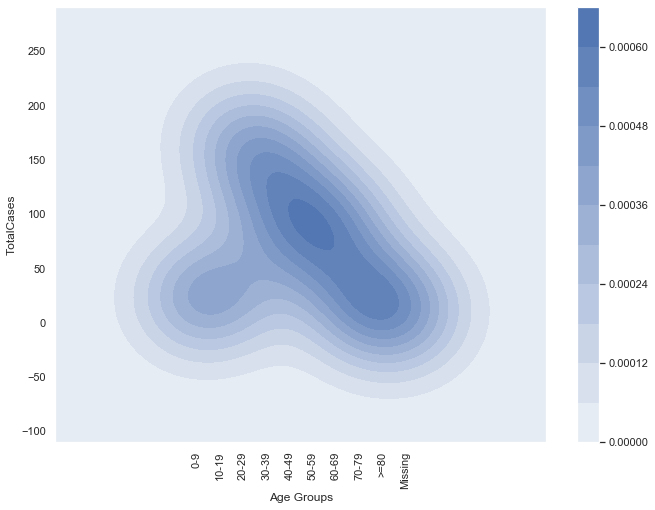

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
x=fread.AgeGroup
y=fread.TotalCases
y_pos=np.arange(len(x))
plt.xticks(y_pos,x)
plt.xticks(rotation=90)
plt.xlabel('Age Groups')
ax=sns.kdeplot(y_pos,y,cmaps='Reds',shade=True,cbar=True)

## Total number of cases,deaths,cured patients in India

Ratio of Deaths that have taken place in the three months to the number of patients who have recovered








In [7]:
covid=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\covid_19_india.csv")

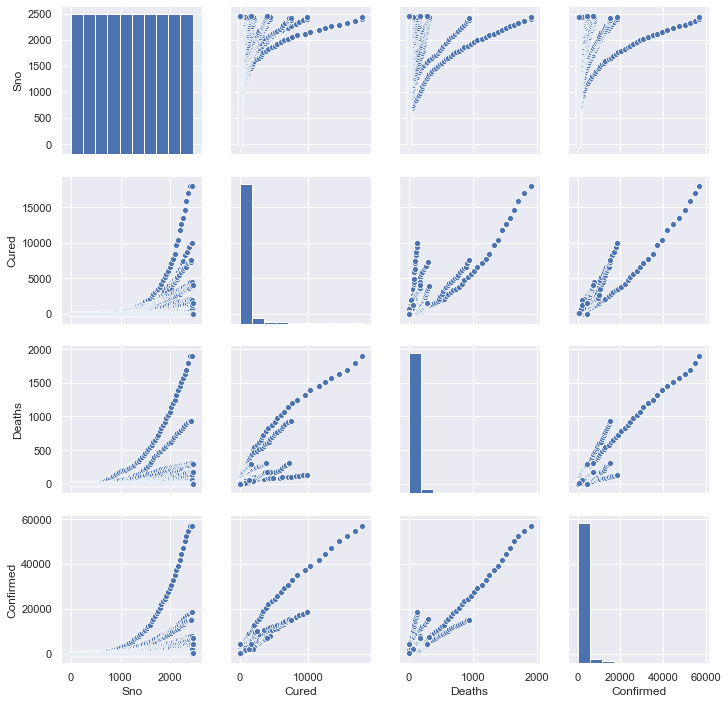

In [8]:
sns.pairplot(covid, palette="Set2")

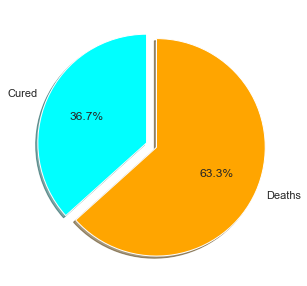

In [9]:
plt.figure(figsize=(5,5))
cured=covid[covid['Cured']==True]
deaths=covid[covid['Deaths']==True]
slices_hours = [cured['Time'].count(),deaths['Time'].count()]
activities = ['Cured', 'Deaths']
colors = ['aqua', 'orange']
explode=(0,0.1)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True)
plt.show()


## Symptoms observed in hospitalized patients with COVID-19

In [10]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]
    
}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms

symptoms  percentage
0                Fever        98.6
1            Tiredness        69.9
2            Dry-cough        82.0
3  Shortness of breath        16.6
4      aches and pains        14.8
5          Sore throat        13.9
6            Diarrhoea        10.1
7               Nausea        10.1
8             vomiting         3.6
9       abdominal pain         2.2

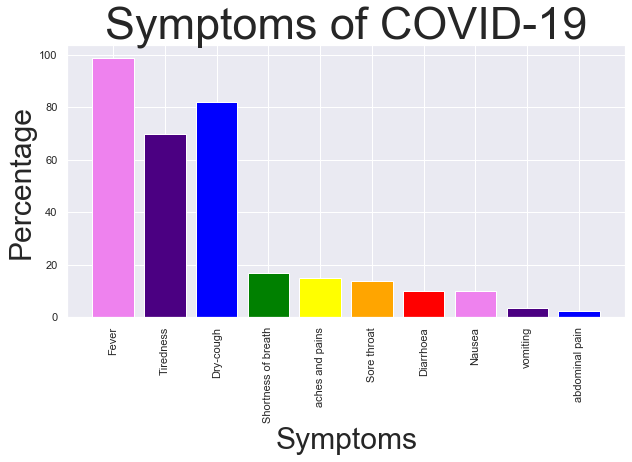

In [11]:
plt.figure(figsize=(10,5))
height=symptoms.percentage
bars=symptoms.symptoms
y_pos=np.arange(len(bars))
my_colors=['violet','indigo','blue','green','yellow','orange','red']
plt.bar(y_pos,height,color=my_colors)
plt.xticks(y_pos,bars)
plt.xticks(rotation=90)
plt.xlabel("Symptoms",size=30)
plt.ylabel("Percentage",size=30)
plt.title("Symptoms of COVID-19",size=45)
plt.show()

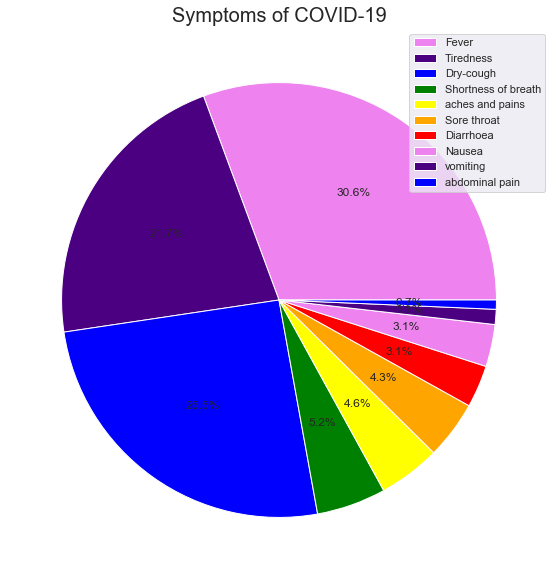

In [12]:
plt.figure(figsize=(10,10))
plt.title("Symptoms of COVID-19",size=20)
plt.pie(symptoms['percentage'],colors=['violet','indigo','blue','green','yellow','orange','red'],autopct="%1.1f%%")
plt.legend(symptoms['symptoms'],loc='best')
plt.show()

## Details of Hospitals and healthcare facilities in India

In [13]:
hosp=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\HospitalBedsIndia.csv")
hosp1=hosp.select_dtypes(include=['float64','int64'])
hosp2=hosp.select_dtypes(include=['object'])

In [14]:
health=hosp.drop([36])
obj=list(health.columns[2:8])

for ob in obj:
    health[ob]=health[ob].astype(int,errors='ignore')

<Figure size 792x576 with 0 Axes>

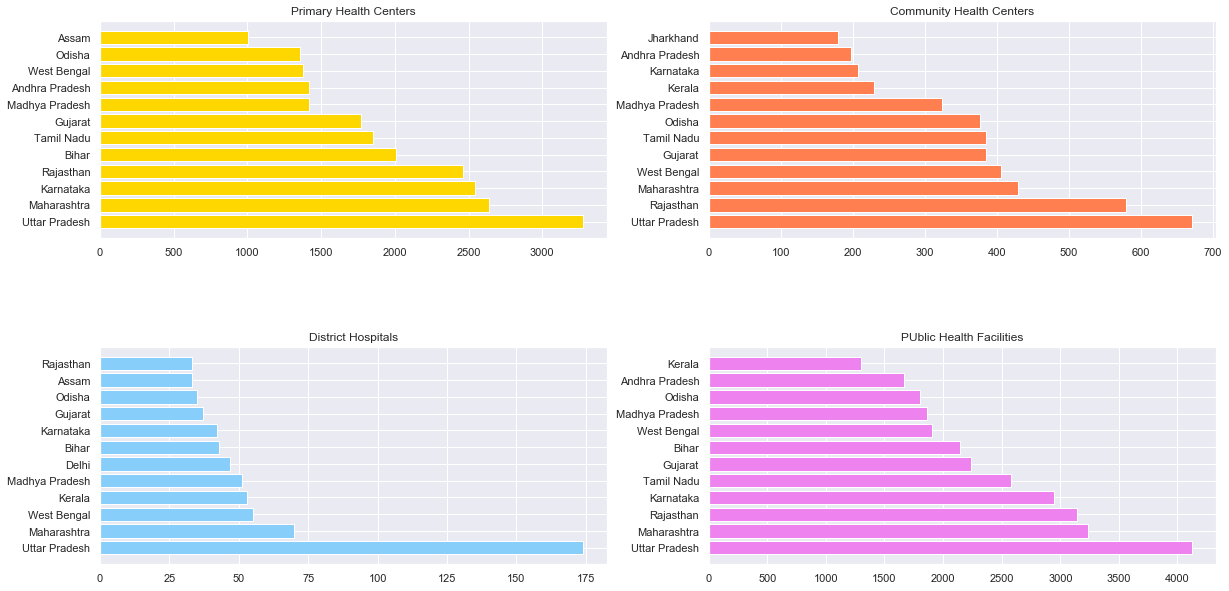

In [15]:
plt.suptitle('HEALTH FACILITIES STATEWISE',fontsize=20)
fig = plt.figure(figsize=(20,10)) 
plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 
plt3 = fig.add_subplot(223) 
plt4 = fig.add_subplot(224) 

primary=health.nlargest(12,'NumPrimaryHealthCenters_HMIS')

plt1.set_title('Primary Health Centers')
plt1.barh(primary['State/UT'],primary['NumPrimaryHealthCenters_HMIS'],color ='gold');

community=health.nlargest(12,'NumCommunityHealthCenters_HMIS')
plt2.set_title('Community Health Centers')
plt2.barh(community['State/UT'],community['NumCommunityHealthCenters_HMIS'],color='coral')

dist=health.nlargest(12,'NumDistrictHospitals_HMIS')
plt3.set_title("District Hospitals")
plt3.barh(dist['State/UT'],dist['NumDistrictHospitals_HMIS'],color='lightskyblue')

subd=health.nlargest(12,'TotalPublicHealthFacilities_HMIS')
plt4.set_title('PUblic Health Facilities')
plt4.barh(subd['State/UT'],subd['TotalPublicHealthFacilities_HMIS'],color='violet')

fig.subplots_adjust(hspace=.5,wspace=0.2) 

In [16]:
indiv=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\IndividualDetails.csv")
indiv2=indiv.select_dtypes(include=['float64','int64'])
indiv3=indiv.select_dtypes(include=['object'])

## Percentage of Males and Females affected

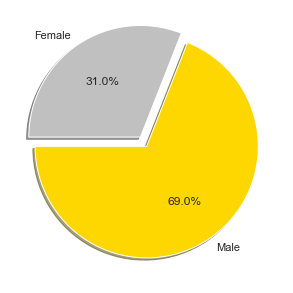

In [17]:
plt.figure(figsize=(5,10))
male=indiv[indiv['gender']=='M']
female=indiv[indiv['gender']=='F']
slices_hours=[male['age'].count(),female['age'].count()]
activities=['Male','Female']
colors=['gold','silver']
explode=(0,0.1)
plt.pie(slices_hours,labels=activities,explode=explode,colors=colors,startangle=180,autopct="%1.1f%%",shadow=True)
plt.show()

## APRIL Analysis of COVID-19


In [18]:
april=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\30-04-2020.csv")
april2=april.select_dtypes(include=['float64','int'])
april3=april.select_dtypes(include=['object'])

In [19]:
april.head()

S. No.           Name of State / UT  \
0      1  Andaman and Nicobar Islands   
1      2               Andhra Pradesh   
2      3            Arunachal Pradesh   
3      4                        Assam   
4      5                        Bihar   

   Total Confirmed cases (Including 111 foreign Nationals)  \
0                                               33.0         
1                                             1463.0         
2                                                1.0         
3                                               42.0         
4                                              426.0         

   Cured/Discharged/Migrated  Death  
0                       16.0    0.0  
1                      403.0   33.0  
2                        1.0    0.0  
3                       29.0    1.0  
4                       82.0    2.0

## Data Preprocessing

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(april['Death'])
print(len(le.classes_))
print(le.classes_)

21
[  0.   1.   2.   3.   4.   8.  19.  22.  26.  27.  33.  41.  58.  59.
 137. 214. 459.  nan  nan  nan  nan]


In [21]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(april['Cured/Discharged/Migrated'])
print(len(le.classes_))
print(le.classes_)

32
[0.000e+00 1.000e+00 2.000e+00 5.000e+00 7.000e+00 1.600e+01 1.700e+01
 2.000e+01 2.800e+01 2.900e+01 3.600e+01 4.100e+01 8.200e+01 9.000e+01
 1.390e+02 2.090e+02 2.160e+02 2.350e+02 3.830e+02 4.030e+02 4.410e+02
 4.820e+02 5.550e+02 6.130e+02 8.360e+02 1.094e+03 1.152e+03 1.258e+03
 1.773e+03       nan       nan       nan]


## Death value counts

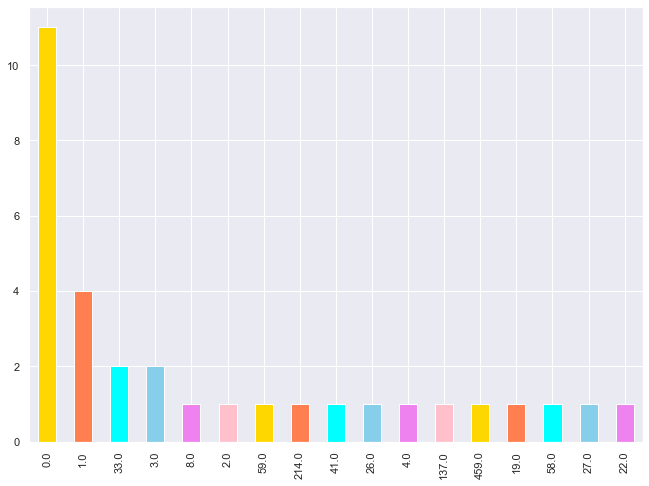

In [22]:
april.Death.value_counts().plot.bar(color=['gold','coral','aqua','skyblue','violet','pink'])


## CURED,TOTAL CASES, DEATHS

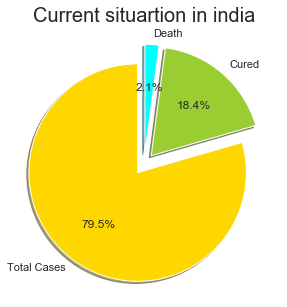

In [23]:
cases=april['Total Confirmed cases (Including 111 foreign Nationals)'].sum()
cdm=april['Cured/Discharged/Migrated'].sum()
d=april['Death'].sum()

plt.figure(figsize=(5,5))
plt.title("Current situartion in india",fontsize=20)
labels='Total Cases','Cured','Death'
sizes=[cases,cdm,d]
explode=[0.1,0.1,0.1]
colors=['gold','yellowgreen','aqua']
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show() 

In [24]:
april['active']=april['Total Confirmed cases (Including 111 foreign Nationals)']-april['Death']-april['Cured/Discharged/Migrated']
print(april['active'].sum())
print(april['Total Confirmed cases (Including 111 foreign Nationals)'].sum())

24755.0
44037.0


## MORTALITY RATE


In [25]:
april['mortality']=april['Death']/april['active']*100
print(april['mortality'])

0     0.000000
1     3.213242
2          NaN
3     8.333333
4     0.584795
5     0.000000
6     0.000000
7     2.497883
8          NaN
9     5.997758
10    2.970297
11    9.090909
12    2.051282
13    3.409091
14    6.896552
15    3.636364
16    0.000000
17    6.523810
18    5.552867
19         NaN
20    9.090909
21    0.000000
22    0.990099
23    0.000000
24    7.661290
25    3.431953
26    2.601156
27    4.545455
28         NaN
29    0.000000
30    2.433234
31    5.296950
32         NaN
33         NaN
34         NaN
35         NaN
Name: mortality, dtype: float64


## State wise Deaths

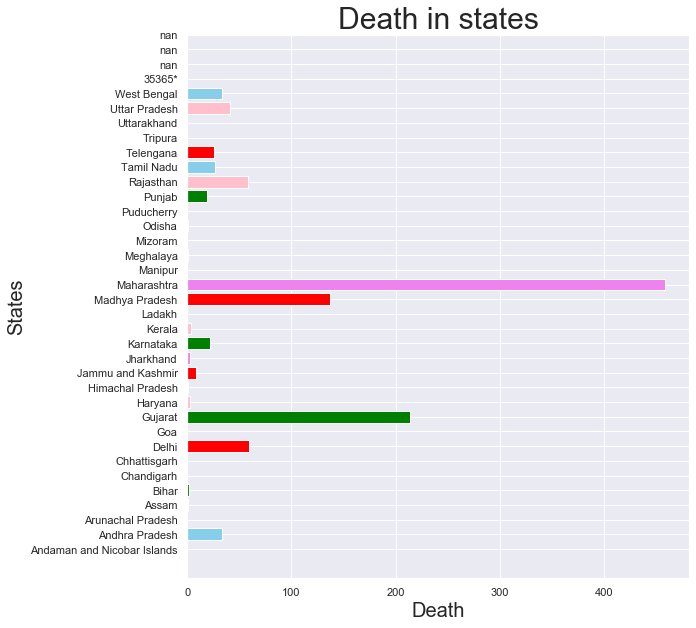

In [26]:
plt.figure(figsize=(9,10))
height=april['Death']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','skyblue','red','violet','green'])
plt.yticks(y_pos,bars)
plt.title("Death in states",size=30)
plt.ylabel("States",size=20)
plt.xlabel("Death",size=20)
plt.show()

## STATE-WISE CURED/MIGRATED/DISCHARGED

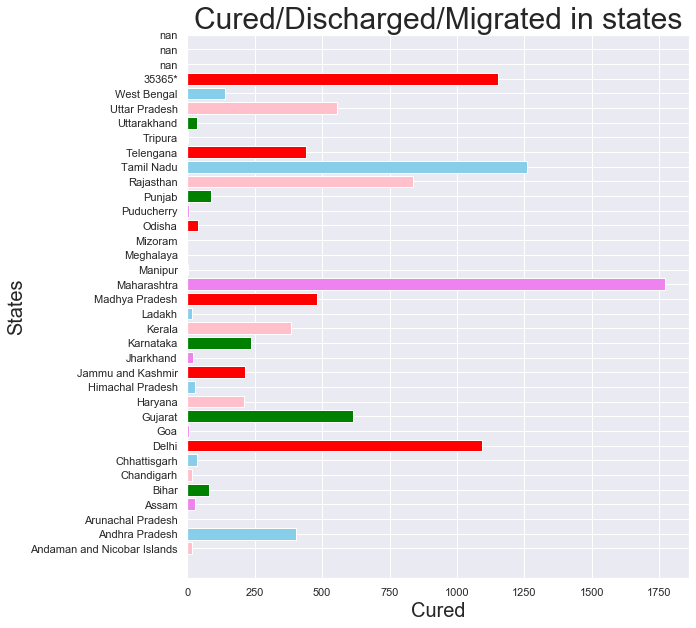

In [27]:
plt.figure(figsize=(9,10))
height=april['Cured/Discharged/Migrated']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','skyblue','red','violet','green'])
plt.yticks(y_pos,bars)
plt.title("Cured/Discharged/Migrated in states",size=30)
plt.ylabel("States",size=20)
plt.xlabel("Cured",size=20)
plt.show()

## State wise Mortality Rate

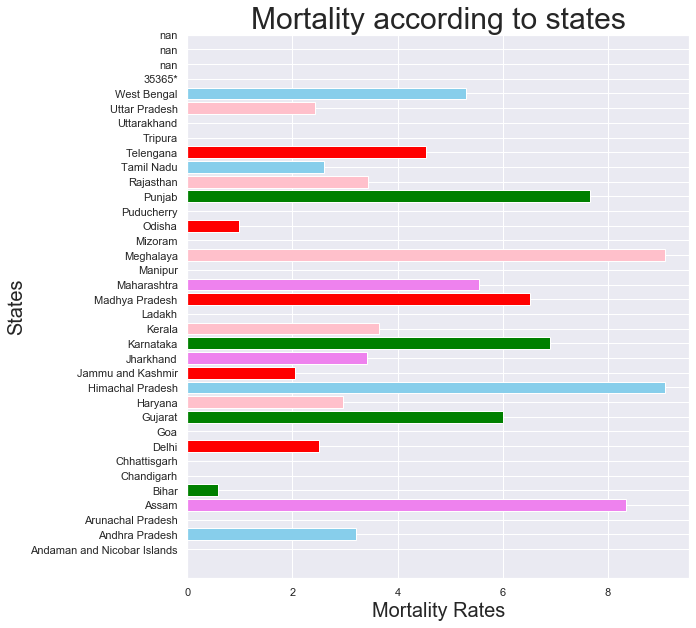

In [28]:
plt.figure(figsize=(9,10))
height=april['mortality']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','skyblue','red','violet','green'])
plt.yticks(y_pos,bars)
plt.title("Mortality according to states",size=30)
plt.ylabel("States",size=20)
plt.xlabel("Mortality Rates",size=20)
plt.show()

## State wise active cases


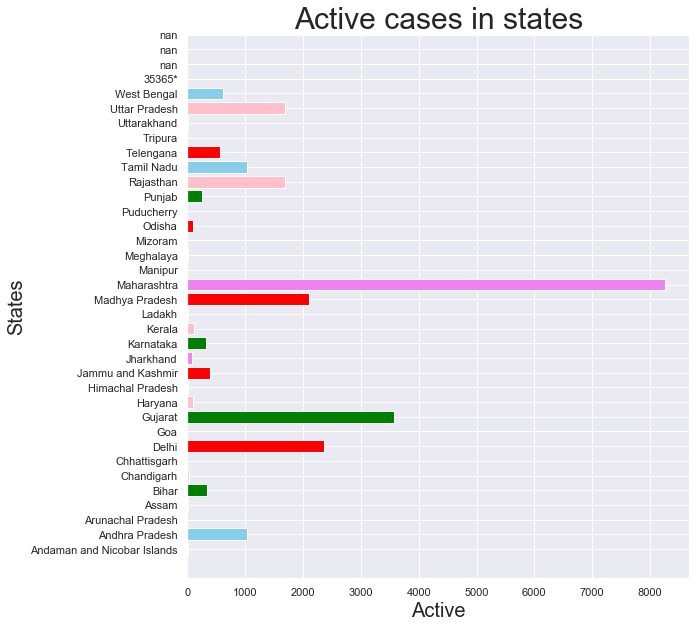

In [29]:
plt.figure(figsize=(9,10))
height=april['active']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','skyblue','red','violet','green'])
plt.yticks(y_pos,bars)
plt.title("Active cases in states",size=30)
plt.ylabel("States",size=20)
plt.xlabel("Active",size=20)
plt.show()

## Perday New Cases

In [30]:
perday=pd.read_excel(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\per_day_cases.xlsx")
perday2=perday.select_dtypes(include=['int64','float64','object'])
perday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
Date                               95 non-null datetime64[ns]
Total Cases                        95 non-null int64
New Cases                          95 non-null int64
Days after surpassing 100 cases    51 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 KB


In [31]:
perday.head()

Date  Total Cases  New Cases  Days after surpassing 100 cases
0 2020-01-30            1          1                              NaN
1 2020-01-31            1          0                              NaN
2 2020-02-01            1          0                              NaN
3 2020-02-02            2          1                              NaN
4 2020-02-03            3          1                              NaN

## APPALLING INCREASE in the COVID19 CASES PERDAY

C:\Users\SAURAV BORAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


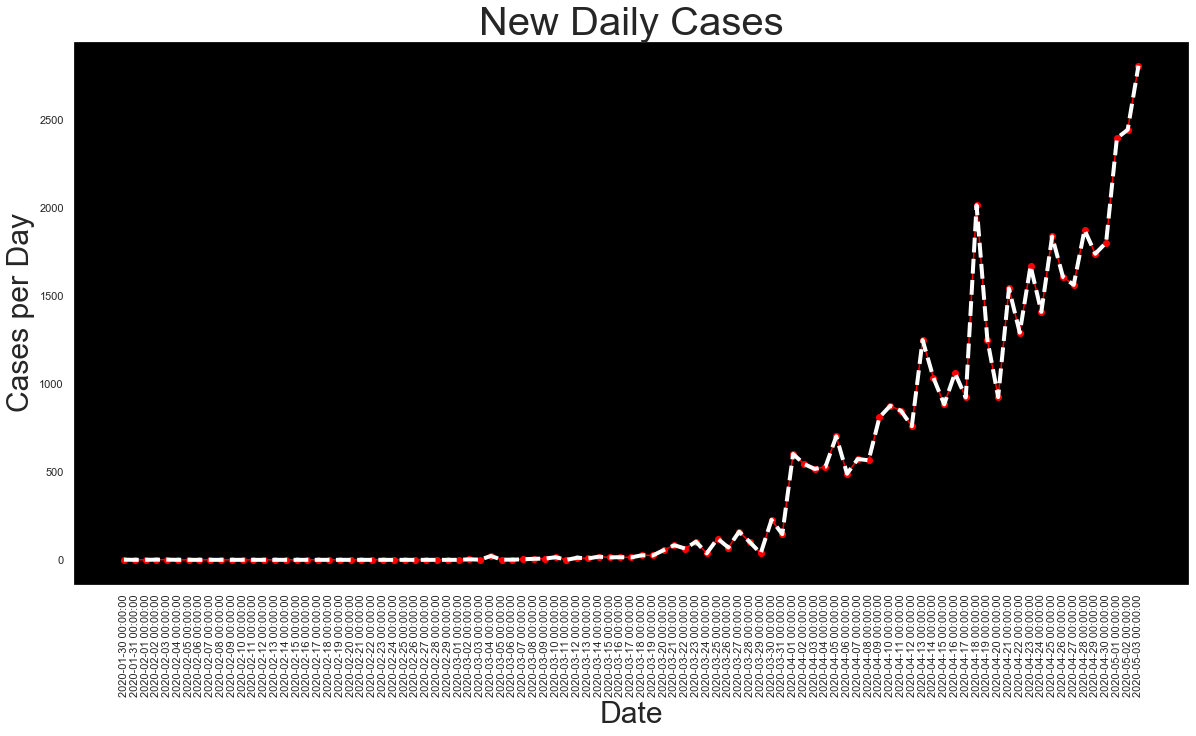

In [32]:
plt.figure(figsize=(20,10),facecolor=(1,1,1))
height=perday['New Cases']
bars=perday['Date']
y_pos=np.arange(len(bars))


plt.plot(y_pos,height,'b-o',color='red')
plt.plot(y_pos,height,'r--',color='white',linewidth=4)
plt.xticks(y_pos,bars)
plt.xticks(rotation=90)
plt.title('New Daily Cases',size=40)
plt.ylabel('Cases per Day',size=30)
plt.xlabel('Date',size=30)
ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)

## IMPACT ON LIFESTYLE

In [33]:
lifestyle={'lifestyle':['Not waste food','Be environment conscious','Be more mindful of Health','Become more hygienic','More Family Time','Spend less on Clothes','Made in India products','Take work more seriously','Boycott Chinese goods'],
          'percentage':[67.7,45.6,44.3,40.5,31.8,31.4,26.4,25.5,24.6]}
lifestyle=pd.DataFrame(data=lifestyle,index=range(9))
lifestyle

lifestyle  percentage
0             Not waste food        67.7
1   Be environment conscious        45.6
2  Be more mindful of Health        44.3
3       Become more hygienic        40.5
4           More Family Time        31.8
5      Spend less on Clothes        31.4
6     Made in India products        26.4
7   Take work more seriously        25.5
8      Boycott Chinese goods        24.6

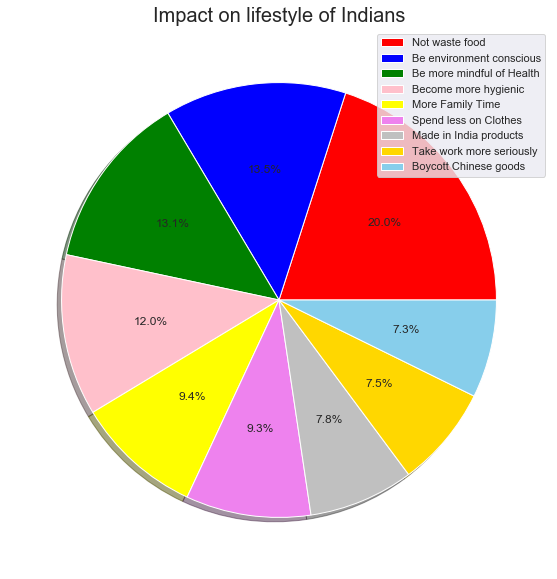

In [34]:
plt.figure(figsize=(10,10))
plt.title("Impact on lifestyle of Indians",fontsize=20)
plt.pie(lifestyle["percentage"],colors=['red','blue','green','pink','yellow','violet','silver','gold','skyblue'],autopct="%1.1f%%",shadow=True)
plt.legend(lifestyle['lifestyle'],loc='upper right')
plt.show()

In [35]:
app=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\complete.csv")
app.head()

Date Name of State / UT  Total Confirmed cases (Indian National)  \
0  2020-01-30             Kerala                                        1   
1  2020-01-31             Kerala                                        1   
2  2020-02-01             Kerala                                        2   
3  2020-02-02             Kerala                                        3   
4  2020-02-03             Kerala                                        3   

   Total Confirmed cases ( Foreign National )  Cured/Discharged/Migrated  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          0   

   Latitude  Longitude  Death  Total Confirmed cases  
0   10.8505    76.2711      0                      1  
1   10.8505    76.2711      0                      1  
2   10.8505    76.2711      0                      2  
3   10.8505    76.2711      0                      3  
4   10.8505    76.2711      0                      3

## Heatmap giving information about deaths across various states

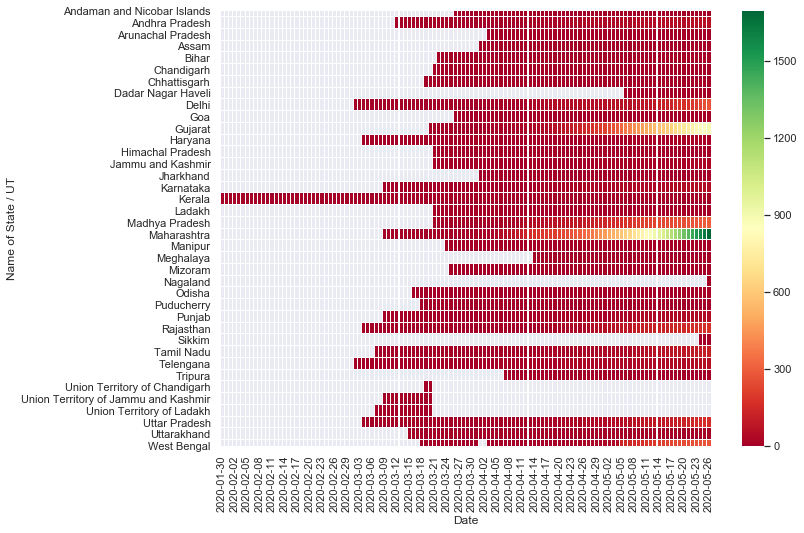

In [36]:
heatmap1_data=pd.pivot_table(app,values='Death',index='Name of State / UT',columns='Date')
sns.heatmap(heatmap1_data,cmap="RdYlGn",linewidths=0.01)

From this heatmap, we can observe that the cases are increases at an alarming rate in India,Maharashtra has the maximum number of covid-19 positives followed by Delhi and tamil Nadu

## Heatmap giving information about Total confirmed cases across various states


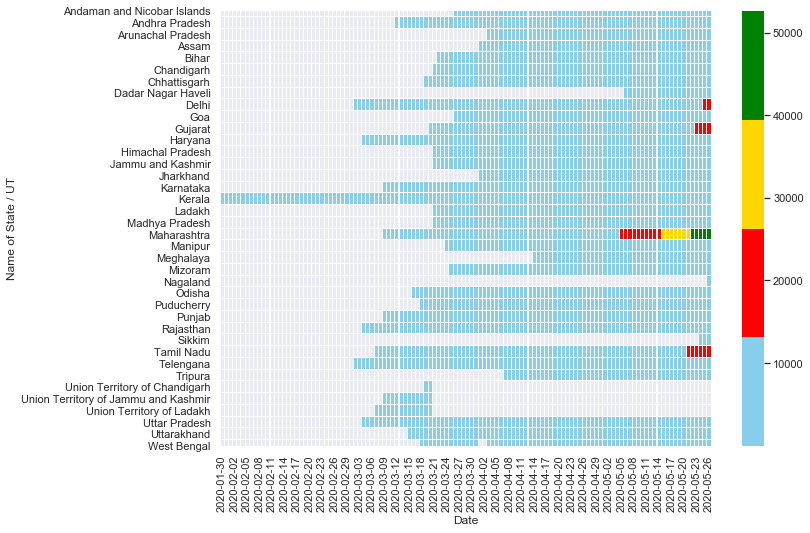

In [37]:
h=pd.pivot_table(app,values='Total Confirmed cases',index=['Name of State / UT'],columns='Date')
sns.heatmap(h,cmap=['skyblue','red','gold','green'],linewidths=0.05)

## Representing the Confirmed cases in India through Geographic Visualization

In [38]:
import folium
m = folium.Map(location=[20.5937, 78.9629],zoom_start=5)
for lat,lon,area,count in zip(app['Latitude'],app['Longitude'],app['Name of State / UT'],app['Total Confirmed cases']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.02,
                            color='red',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='salmon',
                           ).add_to(m)
m.save('LA collisions.html')
m

## Representing the Deaths in India through Geographic Visualization

In [39]:
import folium
m = folium.Map(location=[20.5937, 78.9629],zoom_start=5)
for lat,lon,area,count in zip(app['Latitude'],app['Longitude'],app['Name of State / UT'],app['Death']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.04,
                            color='purple',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='violet',
                           ).add_to(m)
m.save('LA collisions.html')
m

# 

# Covid -19 ANALYSIS TILL MAY 28 , 2020

In [40]:
may=pd.read_csv(r"C:\Users\SAURAV BORAH\Desktop\MACHINE LEARNING\corona ultimate\28-05-2020.csv")
may.head()

S. No.           Name of State / UT  Total Confirmed cases*  \
0      1  Andaman and Nicobar Islands                    33.0   
1      2               Andhra Pradesh                  3171.0   
2      3            Arunachal Pradesh                     2.0   
3      4                        Assam                   781.0   
4      5                        Bihar                  3061.0   

   Cured/Discharged/Migrated  Deaths**  
0                       33.0       0.0  
1                     2057.0      58.0  
2                        1.0       0.0  
3                       87.0       4.0  
4                     1083.0      15.0

In [41]:
may=may.drop([33,34,35,36,37])

## Total confirmed cases till now

In [43]:
cases=may['Total Confirmed cases*'].sum()
cases

142818.0

In [45]:
df=may.nlargest(5,'Total Confirmed cases*')

Text(0.5, 1.0, 'TOP 5 STATES WITH MAXIMUM CASES')

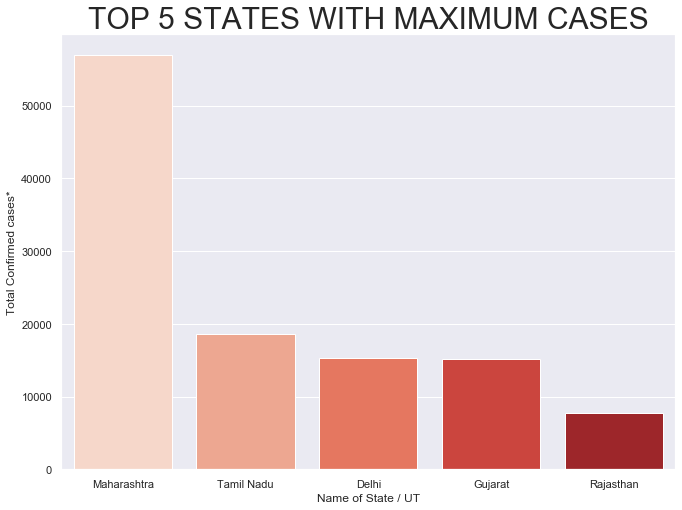

In [47]:
sns.barplot(x=df["Name of State / UT"],y=df["Total Confirmed cases*"],palette="Reds")
plt.title("TOP 5 STATES WITH MAXIMUM CASES",size=30)

Text(0.5, 1.0, 'TOP 5 Infected STATES and the number of people cured')

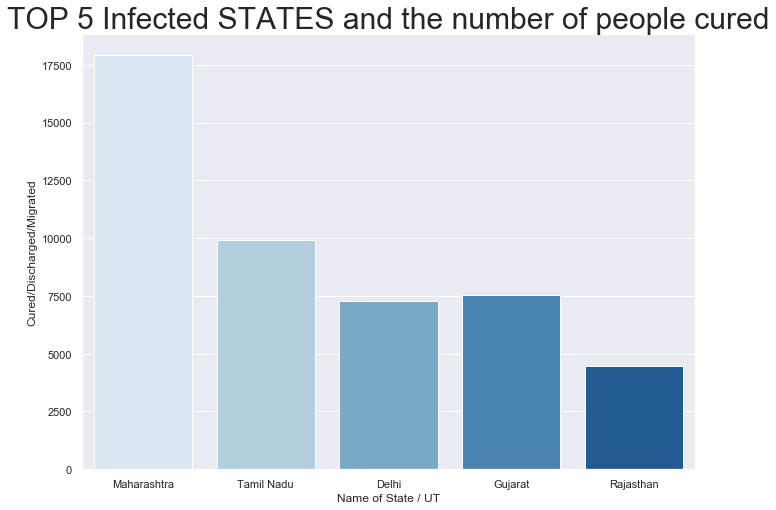

In [49]:
sns.barplot(x=df["Name of State / UT"],y=df["Cured/Discharged/Migrated"],palette="Blues")
plt.title("TOP 5 Infected STATES and the number of people cured",size=30)

Text(0.5, 1.0, 'TOP 5 Infected STATES and the number of Deaths')

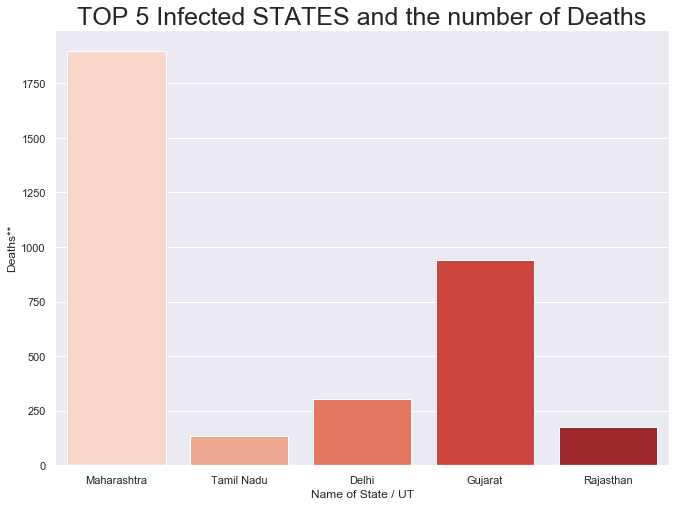

In [50]:
sns.barplot( x=df["Name of State / UT"], y=df["Deaths**"], palette="Reds")
plt.title("TOP 5 Infected STATES and the number of Deaths",size=25)

C:\Users\SAURAV BORAH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SAURAV BORAH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


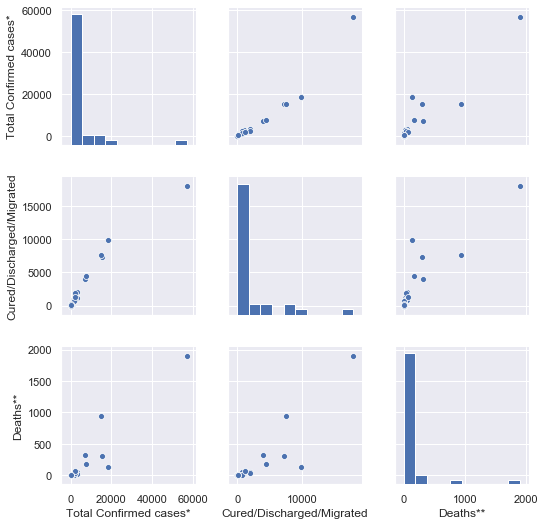

In [51]:
sns.pairplot(may, kind="scatter")
